In [4]:
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np

np.random.seed(123)

# 6.20 a
# AR(1) n=48, phi=0.7
ar_1 = ArmaProcess(ar=[1, -0.7], ma=[1])
samples = ar_1.generate_sample(48)
# theoretical acf out to 5 lags
acf_t = ar_1.acf(lags=6)
for i, v in enumerate(acf_t):
    print(f"Theoretical ACF({i}) = {v:.3f}")

Theoretical ACF(0) = 1.000
Theoretical ACF(1) = 0.700
Theoretical ACF(2) = 0.490
Theoretical ACF(3) = 0.343
Theoretical ACF(4) = 0.240
Theoretical ACF(5) = 0.168


In [5]:
import numpy as np

# 6.20 helper functions


# equation 6.1.6
def r1_std_dev(n, phi):
    return np.sqrt((1 / n) * (1 - phi**2))


def r5_std_dev(n, phi):
    return np.sqrt((1 / n) * ((1 + phi**2) / (1 - phi**2)))

In [6]:
# 6.20 b
from statsmodels.tsa.stattools import acf

# Calculate sample acf
acf_s = acf(samples, nlags=5)
for i, v in enumerate(acf_s):
    print(f"Sample ACF({i}) = {v:.3f}")

t1, t5 = acf_t[1], acf_t[5]
r1, r5 = acf_s[1], acf_s[4]
r1_std_err = r1_std_dev(48, 0.7)
r5_std_err = r5_std_dev(48, 0.7)
print(f"r1 std deviation = {r1_std_err:.3f}")
print(f"r5 std deviation = {r5_std_err:.3f}")
print(f"r1 std error =  {(abs(r1 - t1) / r1_std_err):.3f}")
print(f"r5 std error = {(abs(r5 - t5) / r5_std_err):.3f}")

Sample ACF(0) = 1.000
Sample ACF(1) = 0.750
Sample ACF(2) = 0.550
Sample ACF(3) = 0.462
Sample ACF(4) = 0.316
Sample ACF(5) = 0.142
r1 std deviation = 0.103
r5 std deviation = 0.247
r1 std error =  0.482
r5 std error = 0.601


In [7]:
# 6.20 c

# theoretical acf out to 5 lags
ar_1 = ArmaProcess(ar=[1, -0.7], ma=[1])
samples = ar_1.generate_sample(48)
acf_t = ar_1.acf(lags=6)
acf_s = acf(samples, nlags=5)
for i, v in enumerate(acf_s):
    print(f"Sample ACF({i}) = {v:3f}")

t1, t5 = acf_t[1], acf_t[5]
r1, r5 = acf_s[1], acf_s[4]
r1_std_err = r1_std_dev(48, 0.7)
r5_std_err = r5_std_dev(48, 0.7)
print(f"r1 std deviation = {r1_std_err:.3f}")
print(f"r5 std deviation = {r5_std_err:.3f}")
print(f"r1 std error =  {(abs(r1 - t1) / r1_std_err):.3f}")
print(f"r5 std error = {(abs(r5 - t5) / r5_std_err):.3f}")

# The precision of the estimate in this simulation is similar to the precision of the previous estimate

Sample ACF(0) = 1.000000
Sample ACF(1) = 0.622437
Sample ACF(2) = 0.428134
Sample ACF(3) = 0.329097
Sample ACF(4) = 0.204791
Sample ACF(5) = 0.303691
r1 std deviation = 0.103
r5 std deviation = 0.247
r1 std error =  0.752
r5 std error = 0.149


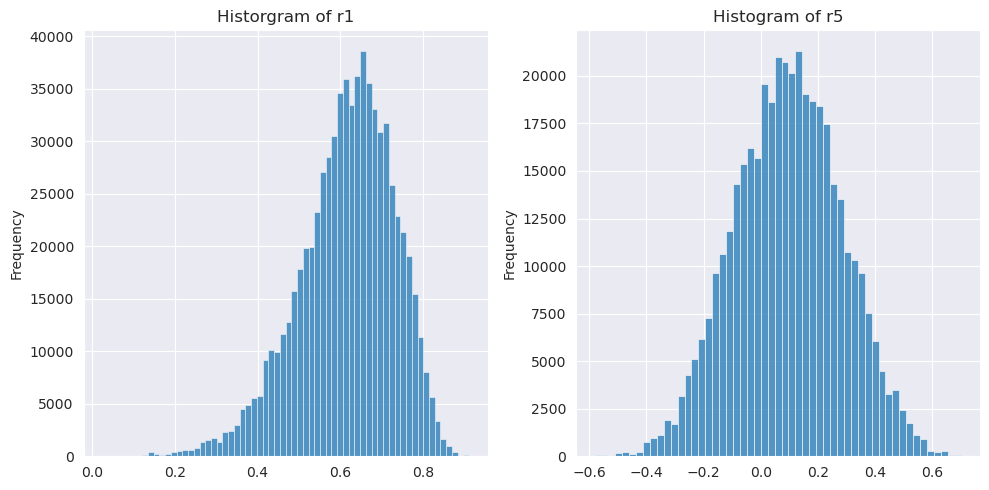

In [8]:
# 6.20 d
import seaborn as sns
import matplotlib.pyplot as plt

r1_list = []
r5_list = []
for i in range(10000):
    ar_1 = ArmaProcess(ar=[1, -0.7], ma=[1])
    samples = ar_1.generate_sample(48)
    acf_s = acf(samples, nlags=5)
    r1_list.append(acf_s[1])
    r5_list.append(acf_s[4])

sns.set_style("darkgrid")
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(r1_list, stat="frequency", ax=ax[0])
ax[0].set_title("Historgram of r1")
sns.histplot(r5_list, stat="frequency", ax=ax[1])
ax[1].set_title("Histogram of r5")
plt.tight_layout()

In [9]:
# 6.28 a
from statsmodels.tsa.arima_process import ArmaProcess
import numpy as np

np.random.seed(123)
ma_2 = ArmaProcess(ar=[1], ma=[1, -0.7, 0.4])
acf_t = ma_2.acf(lags=21)
for i, v in enumerate(acf_t):
  print(f"Theoretical ACF({i}) = {v:.3f}")


Theoretical ACF(0) = 1.000
Theoretical ACF(1) = -0.594
Theoretical ACF(2) = 0.242
Theoretical ACF(3) = 0.000
Theoretical ACF(4) = 0.000
Theoretical ACF(5) = 0.000
Theoretical ACF(6) = 0.000
Theoretical ACF(7) = 0.000
Theoretical ACF(8) = 0.000
Theoretical ACF(9) = 0.000
Theoretical ACF(10) = 0.000
Theoretical ACF(11) = 0.000
Theoretical ACF(12) = 0.000
Theoretical ACF(13) = 0.000
Theoretical ACF(14) = 0.000
Theoretical ACF(15) = 0.000
Theoretical ACF(16) = 0.000
Theoretical ACF(17) = 0.000
Theoretical ACF(18) = 0.000
Theoretical ACF(19) = 0.000
Theoretical ACF(20) = 0.000


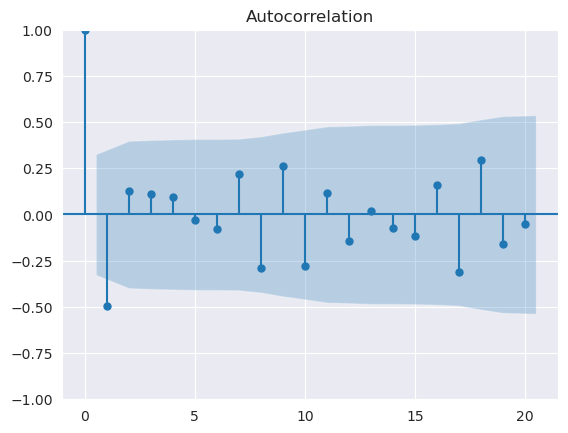

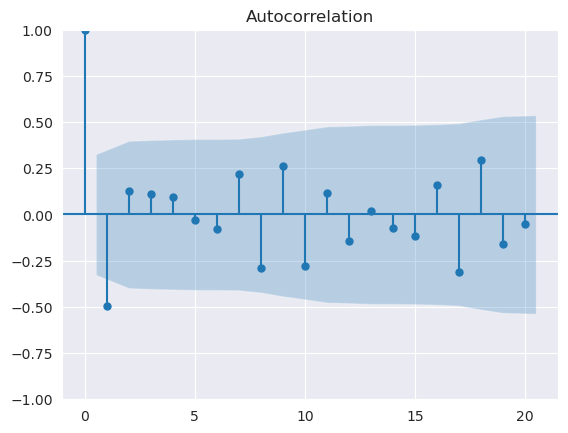

In [10]:
# 6.28 b
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

samples = ma_2.generate_sample(36)
acf_s = acf(samples, nlags=20)

plot_acf(samples, lags=20)

# The simulated sample only indicates lag 1 is significant, but the theoretical acf indicates that up to lag 2 is significant
# Futhermore, lags past 2 are not strictly zero, but they are all insignificant

Text(0.5, 1.0, 'Theoretical PACF for MA(2) process')

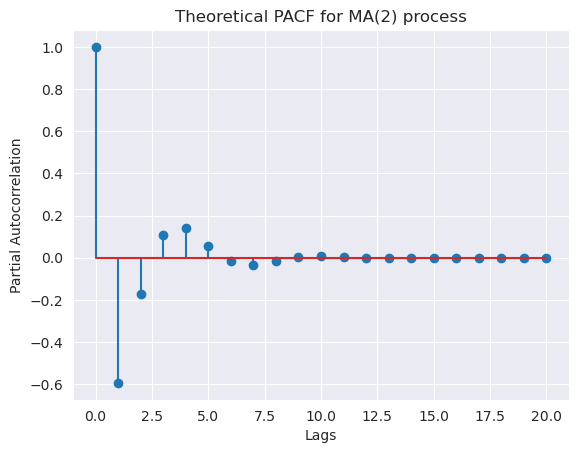

In [11]:
# 6.28 c
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

pacf_t = ma_2.pacf(lags=21)
plt.stem(range(len(pacf_t)), pacf_t)
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.title('Theoretical PACF for MA(2) process')


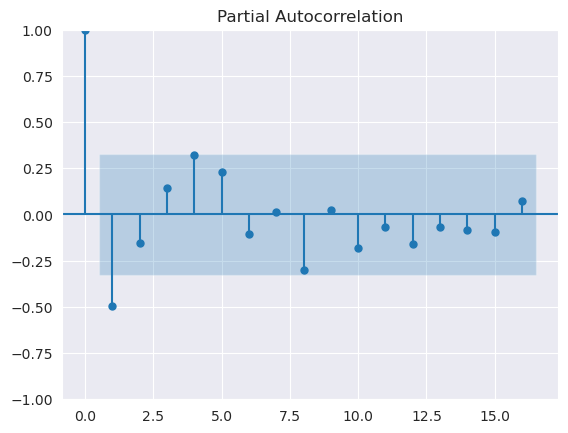

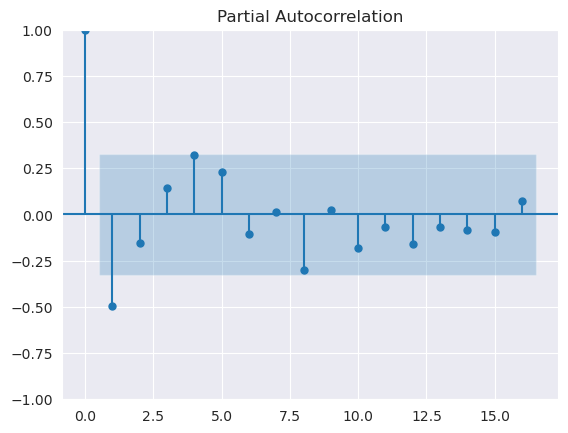

In [12]:
# 6.28 d
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(samples)
# The sample partical autocorrelation fits well

Text(0.5, 1.0, 'Theoretical ACF for ARMA(1,1) process')

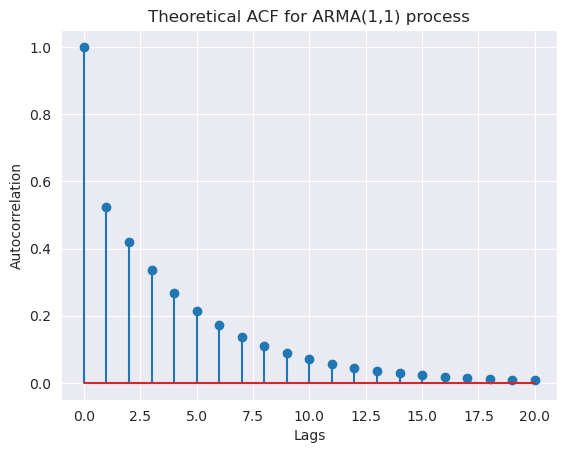

In [13]:
# 6.30 a
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(123)
arma_11 = ArmaProcess(ar=[1, -0.8], ma=[1, -0.4])
acf_t = arma_11.acf(lags=21)
plt.stem(
    range(len(acf_t)),
    acf_t,
)
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.title("Theoretical ACF for ARMA(1,1) process")

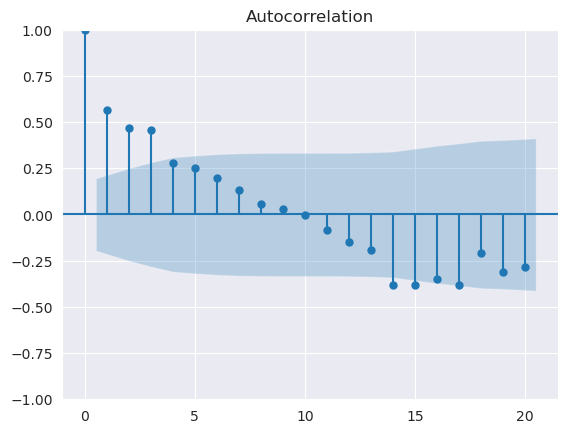

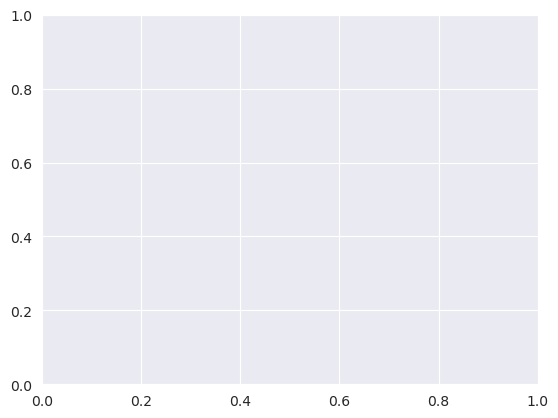

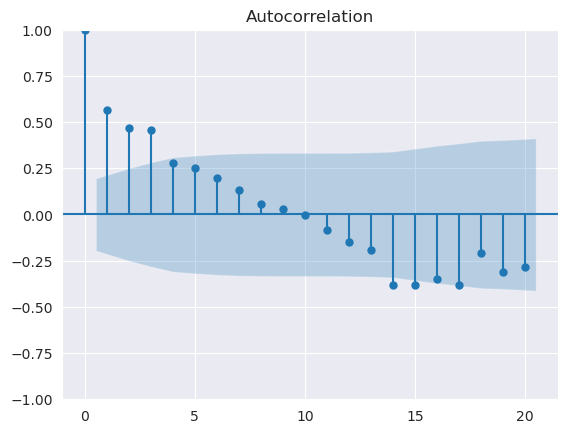

In [14]:
# 6.30 b
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots()
samples = arma_11.generate_sample(nsample=100)
plot_acf(samples, lags=20)

# The theoretical acf takes much longer to decay than the sample acf seems to

In [15]:
# 6.30 c
from eacf import eacf
eacf(samples)
# The wedge at (1,1) indicates an ARMA(1,1) process is appropriate


AR / MA
  0  1  2  3  4  5  6  7  8  9  10 11 12 13
0  x  x  x  x  x  o  o  o  o  o  o  o  o  x
1  x  o  x  o  o  o  o  o  o  o  o  o  o  x
2  x  x  o  o  o  o  o  o  o  o  o  o  o  o
3  x  o  o  o  o  o  o  o  o  o  o  o  o  o
4  x  x  o  o  o  o  o  o  o  o  o  o  o  o
5  x  x  o  o  o  o  o  o  o  o  o  o  o  o
6  o  o  o  o  o  o  o  o  o  o  o  o  o  o
7  o  x  x  x  o  o  o  o  o  o  o  o  o  o


{'eacf': array([[ 5.63206681e-01,  4.67601080e-01,  4.58068084e-01,
          2.80169427e-01,  2.52655105e-01,  1.94773255e-01,
          1.32375325e-01,  5.62785494e-02,  2.82444122e-02,
         -6.58675130e-04, -8.17696497e-02, -1.46787465e-01,
         -1.91007038e-01, -3.81172887e-01],
        [-3.44914997e-01, -1.05897149e-01,  2.42842172e-01,
         -1.59568788e-01,  6.12797523e-02,  1.38422681e-02,
          6.80760664e-02, -5.45196921e-03,  2.61468469e-02,
          3.10950611e-03, -2.77545999e-02, -3.43816509e-02,
          2.46782455e-02, -2.17286092e-01],
        [-5.08101586e-01, -2.16545147e-01,  1.80037313e-01,
         -1.01319217e-01,  1.26144582e-01, -1.74147337e-02,
          5.59256715e-02,  2.93030815e-03,  6.37700087e-03,
          1.36782235e-02, -2.24904565e-02, -2.89672907e-02,
         -7.49617961e-03, -2.14372215e-01],
        [ 4.44689302e-01,  1.23628044e-01,  5.89701153e-02,
          5.58800295e-02,  5.58910223e-02,  1.08940877e-01,
          5.90100524

AR / MA
  0  1  2  3  4  5  6  7  8  9  10 11 12 13
0  x  x  x  x  x  o  o  o  o  o  o  o  o  x
1  x  o  x  o  o  o  o  o  o  o  o  o  o  x
2  x  x  o  o  o  o  o  o  o  o  o  o  o  o
3  x  o  o  o  o  o  o  o  o  o  o  o  o  o
4  x  x  o  o  o  o  o  o  o  o  o  o  o  o
5  x  x  o  o  o  o  o  o  o  o  o  o  o  o
6  o  o  o  o  o  o  o  o  o  o  o  o  o  o
7  o  x  x  x  o  o  o  o  o  o  o  o  o  o


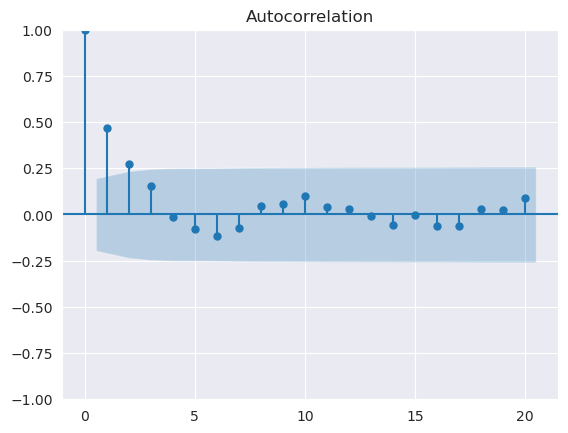

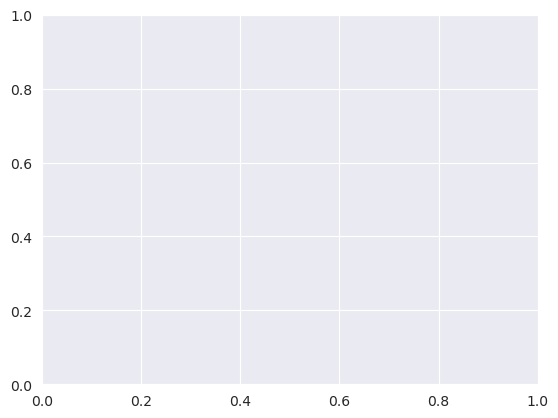

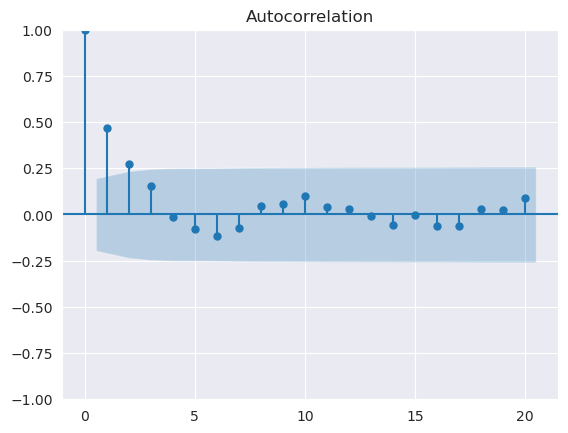

In [16]:
# 6.30 d
from statsmodels.graphics.tsaplots import plot_acf
from eacf import eacf

eacf(samples)
fig, ax = plt.subplots()
samples = arma_11.generate_sample(nsample=100)
plot_acf(samples, lags=20)

AR / MA
  0  1  2  3  4  5  6  7  8  9  10 11 12 13
0  x  x  o  o  o  o  o  o  o  o  o  o  o  o
1  o  o  o  o  o  o  o  o  o  o  o  o  o  o
2  o  o  o  o  o  o  o  o  o  o  o  o  o  o
3  o  x  x  o  o  o  o  o  o  o  o  o  o  o
4  x  x  x  o  o  o  o  o  o  o  o  o  o  o
5  x  x  o  x  o  o  o  o  o  o  o  o  o  o
6  x  x  o  x  o  o  o  o  o  o  o  o  o  o
7  x  x  x  x  o  o  o  o  o  o  o  o  o  o


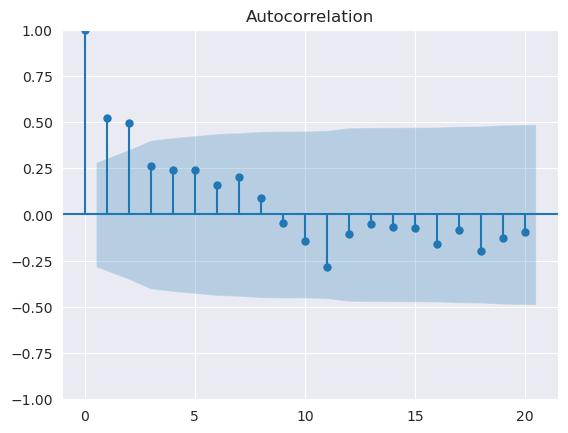

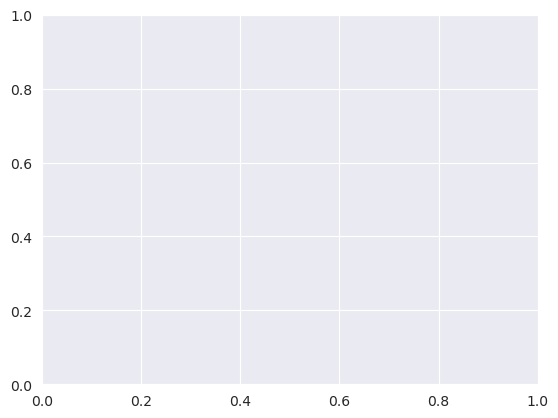

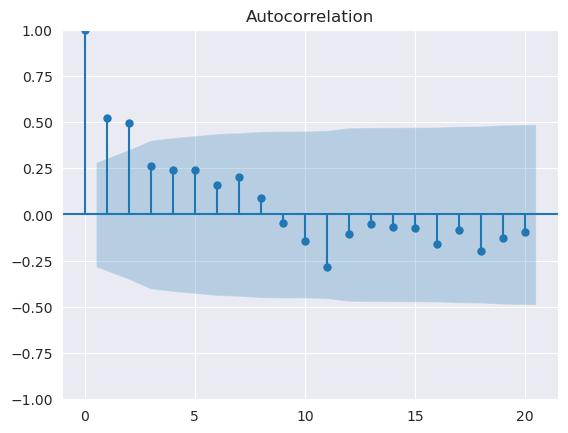

In [17]:
# 6.30 e

from statsmodels.graphics.tsaplots import plot_acf
from eacf import eacf

eacf(samples)
fig, ax = plt.subplots()
samples = arma_11.generate_sample(nsample=48)
plot_acf(samples, lags=20)
# acf decays much more quickly than with 100 and 200 samples
# eacf does not always suggest an ARMA(1,1) process is correct. At times, an AR(1) model is suggested

AR / MA
  0  1  2  3  4  5  6  7  8  9  10 11 12 13
0  x  x  o  o  o  o  o  o  o  o  o  o  o  o
1  x  o  o  o  o  o  o  o  o  o  x  o  o  o
2  x  o  o  o  o  o  o  o  o  o  x  o  o  o
3  x  o  o  o  o  o  o  o  o  o  o  o  o  o
4  x  x  x  o  o  o  o  o  o  o  o  o  o  o
5  x  o  o  o  o  o  o  o  o  o  x  o  o  o
6  x  x  o  o  o  o  o  o  o  o  x  o  o  o
7  x  o  o  o  o  o  o  o  o  o  x  o  o  o


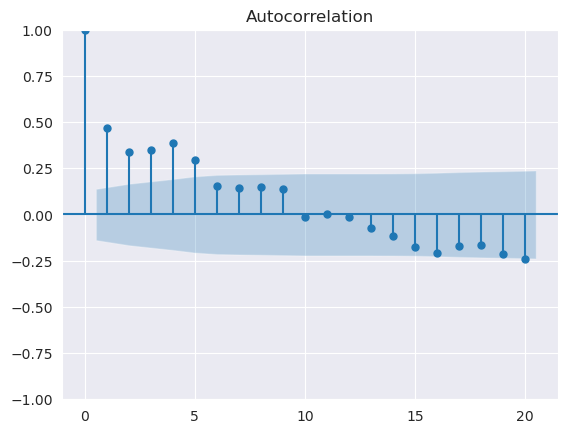

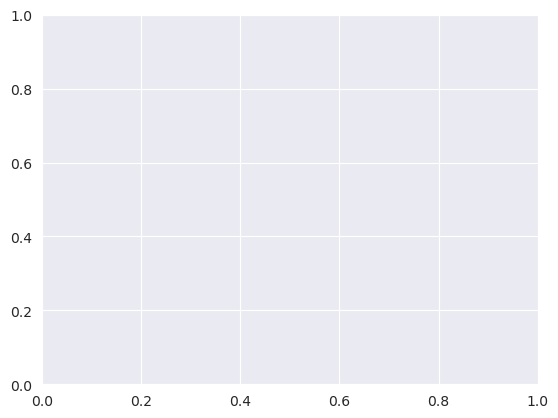

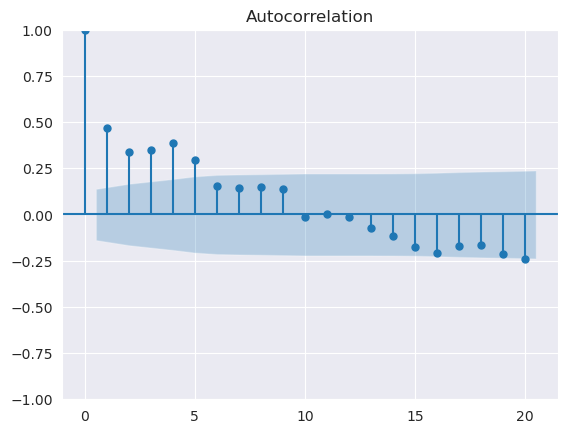

In [18]:
# 6.30 f

from statsmodels.graphics.tsaplots import plot_acf
from eacf import eacf

eacf(samples)
fig, ax = plt.subplots()
samples = arma_11.generate_sample(nsample=200)
plot_acf(samples, lags=20)
# eacf indicates an ARMA(1,1) process is sufficient
# acf plot takes longer to decay than cases with fewer samples

ADF Statistic: -4.11843812100417
p-value: 0.0009027456101120887
Critical Values:
	1%: -3.560242358792829
	5%: -2.9178502070837
	10%: -2.5967964150943397


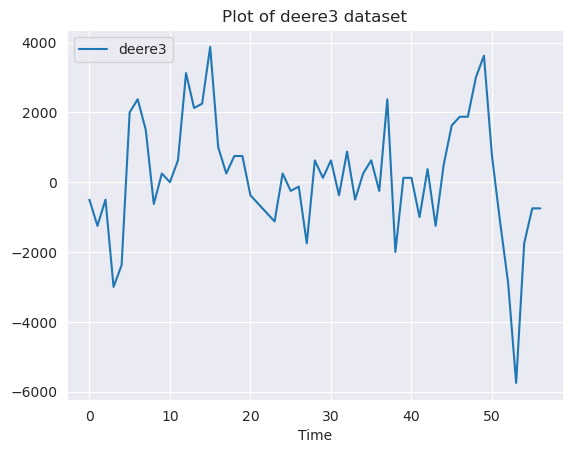

In [19]:
# 6.35 a
import pandas as pd
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv("../datasets/deere3.dat")

ax = df.plot()
ax.set_title("Plot of deere3 dataset")
ax.set_xlabel("Time")

result = adfuller(df["deere3"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")

# ADF test indicates that a stationary model is appropriate because the ADF statistic 
# is more negative than the critical values and the p-value < 0.05
# The null hypothesis can be rejected

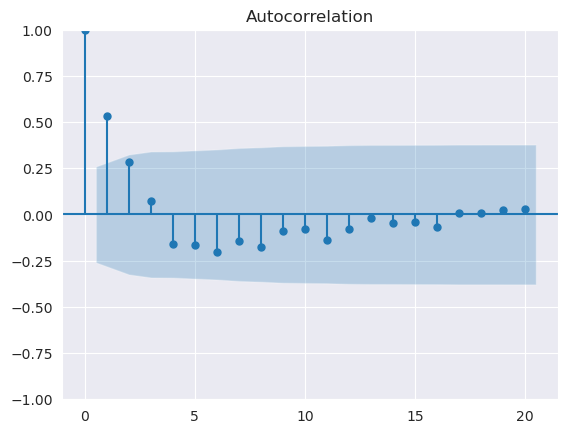

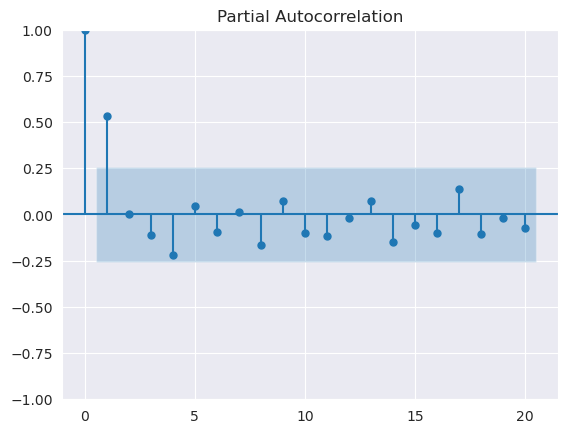

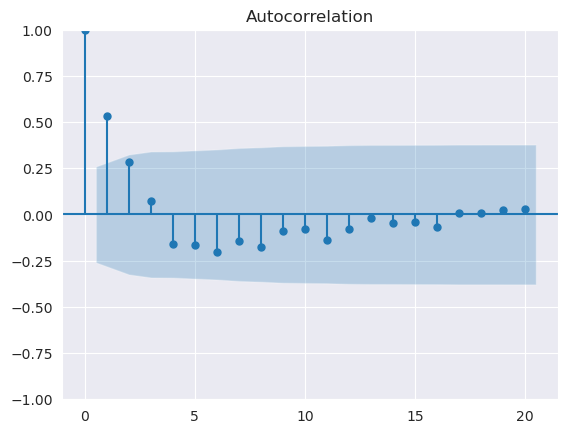

In [20]:
# 6.35 b
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(df["deere3"], lags=20)
plot_acf(df["deere3"], lags=20)

# PACF indicates an AR(1) model
# ACF indicates an MA(1) model
# An ARMA(1,1) model may be appropriate

ADF Statistic: -2.8810644606753137
p-value: 0.0475946682432813
Critical Values:
	1%: -3.4514843502727306
	5%: -2.8708485956333556
	10%: -2.571729625657462


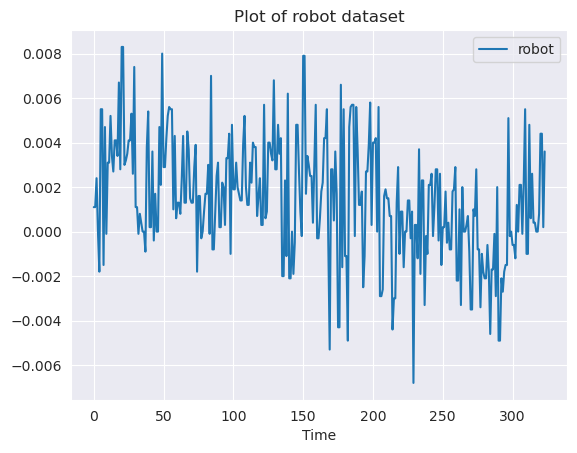

In [21]:
# 6.36 a
import pandas as pd
from statsmodels.tsa.stattools import adfuller

df = pd.read_csv("../datasets/robot.dat")
ax = df.plot()
ax.set_title("Plot of robot dataset")
ax.set_xlabel("Time")

result = adfuller(df["robot"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
print("Critical Values:")
for key, value in result[4].items():
    print(f"\t{key}: {value}")

#The data may be stationary, but the second half has more extreme fluctuations than the first
# The p-value from the ADF test is < 0.05, rejecting the null hypothesis and indicating the the data is stationary

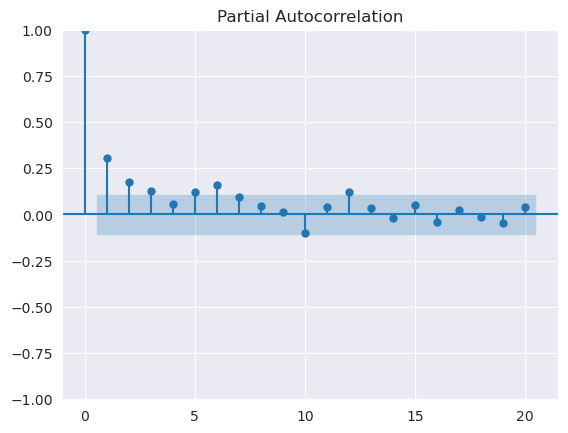

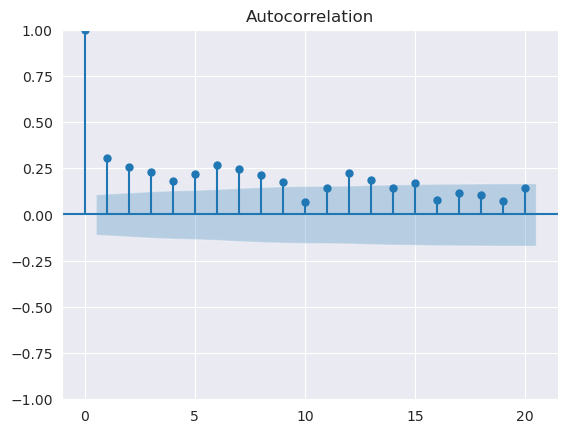

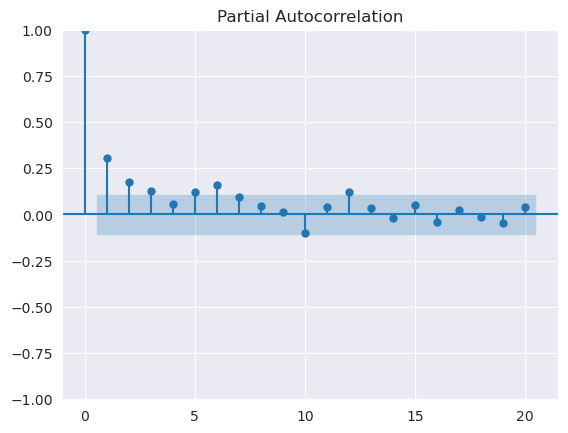

In [22]:
# 6.36 b
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df["robot"], lags=20)
plot_pacf(df["robot"], lags=20)

# The PACF may suggest an AR(2) or AR(3) process, but neither plot is very clear

In [23]:
# 6.36 c
from eacf import eacf

eacf(df["robot"])
# eacf shows a wedge at (1,1), indicating an ARMA(1,1) may be sufficient

AR / MA
  0  1  2  3  4  5  6  7  8  9  10 11 12 13
0  x  x  x  x  x  x  x  x  x  o  x  x  x  x
1  x  o  o  o  o  o  o  o  o  o  o  o  o  o
2  x  x  o  o  o  o  o  o  o  o  o  o  o  o
3  x  x  o  o  o  o  o  o  o  o  o  o  o  o
4  x  x  x  x  o  o  o  o  o  o  o  o  x  o
5  x  x  x  o  o  o  o  o  o  o  o  o  x  o
6  x  o  o  o  o  x  o  o  o  o  o  o  o  o
7  x  o  o  x  o  x  x  o  o  o  o  o  o  o


{'eacf': array([[ 0.30783324,  0.25566978,  0.23055698,  0.17865198,  0.22107288,
          0.27033903,  0.24611092,  0.21142418,  0.17727591,  0.0657404 ,
          0.14272676,  0.22197397,  0.18413854,  0.14504361],
        [-0.44188099, -0.02007059,  0.02865833, -0.05812144,  0.00289559,
          0.05456465,  0.01040185,  0.0049814 ,  0.10905437, -0.06956896,
          0.01355753,  0.09205447,  0.00772909, -0.04809674],
        [-0.47769714, -0.36770269, -0.00899962, -0.06013464,  0.0035323 ,
          0.04707314, -0.00923839,  0.00175975,  0.03692374, -0.10301412,
          0.02284102,  0.08743436,  0.01962908, -0.02054628],
        [-0.37799658, -0.20003365,  0.05464008, -0.0575174 ,  0.00831237,
          0.04701204, -0.00207617,  0.00072865,  0.00823704, -0.10524787,
          0.0159419 ,  0.01251022,  0.07717237,  0.0359637 ],
        [-0.39088297, -0.20295401, -0.36576387, -0.1131541 ,  0.012211  ,
          0.00422983,  0.03733165,  0.01454722,  0.02261827, -0.11012891,
    

In [24]:
%%capture
%run armasubsets.py

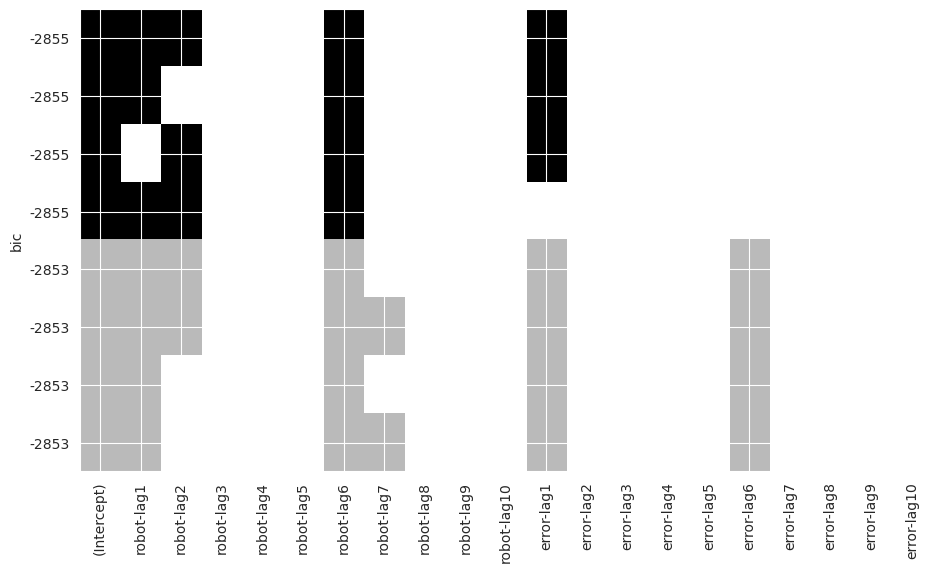

[(-2854.7763504540453,
  ['(Intercept)', 'error-lag1', 'robot-lag1', 'robot-lag2', 'robot-lag6']),
 (-2854.7763504540453,
  ['(Intercept)', 'error-lag1', 'robot-lag1', 'robot-lag6']),
 (-2854.7763504540444,
  ['(Intercept)', 'error-lag1', 'robot-lag2', 'robot-lag6']),
 (-2854.7763504540444,
  ['(Intercept)', 'robot-lag1', 'robot-lag2', 'robot-lag6']),
 (-2852.915591260333,
  ['(Intercept)',
   'error-lag1',
   'error-lag6',
   'robot-lag1',
   'robot-lag2',
   'robot-lag6']),
 (-2852.915591260333,
  ['(Intercept)',
   'error-lag1',
   'error-lag6',
   'robot-lag1',
   'robot-lag2',
   'robot-lag6',
   'robot-lag7']),
 (-2852.915591260333,
  ['(Intercept)', 'error-lag1', 'error-lag6', 'robot-lag1', 'robot-lag6']),
 (-2852.915591260333,
  ['(Intercept)',
   'error-lag1',
   'error-lag6',
   'robot-lag1',
   'robot-lag6',
   'robot-lag7'])]

In [25]:
# 6.36 d
armasubsets(y=df["robot"], nar=10, nma=10, y_name="robot")
# This indicates an ARMA(1,1) model because robot-lag1 and error-lag1 both have the same BIC level